#  Iris Dataset Machine Learning Tutorial

Welcome to your comprehensive machine learning tutorial using the famous Iris dataset! 

In this notebook, you'll learn:
- Data exploration and visualization
- Data preprocessing
- Training multiple ML algorithms
- Model evaluation and comparison
- Hyperparameter tuning
- Making predictions on new data

Let's get started! 


## Step 1: Import Libraries

First, let's import all the libraries we'll need for our machine learning journey.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print(" All libraries imported successfully!")


 All libraries imported successfully!


## Step 2: Load and Explore the Iris Dataset

The Iris dataset is a classic dataset in machine learning. It contains measurements of 150 iris flowers from three different species.


In [4]:
# Load the Iris dataset
iris = datasets.load_iris()

# Create a DataFrame for easier manipulation
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Dataset Shape:", df.shape)
print("\nFeature names:", iris.feature_names)
print("Target names:", iris.target_names)

# Display first few rows
df.head()


Dataset Shape: (150, 6)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
# Basic statistics
print("Basic Statistics:")
df.describe()


Basic Statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
# Check species distribution
print("Species Distribution:")
print(df['species_name'].value_counts())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Species Distribution:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64


## Step 3: Data Visualization

Let's create some visualizations to better understand our data!


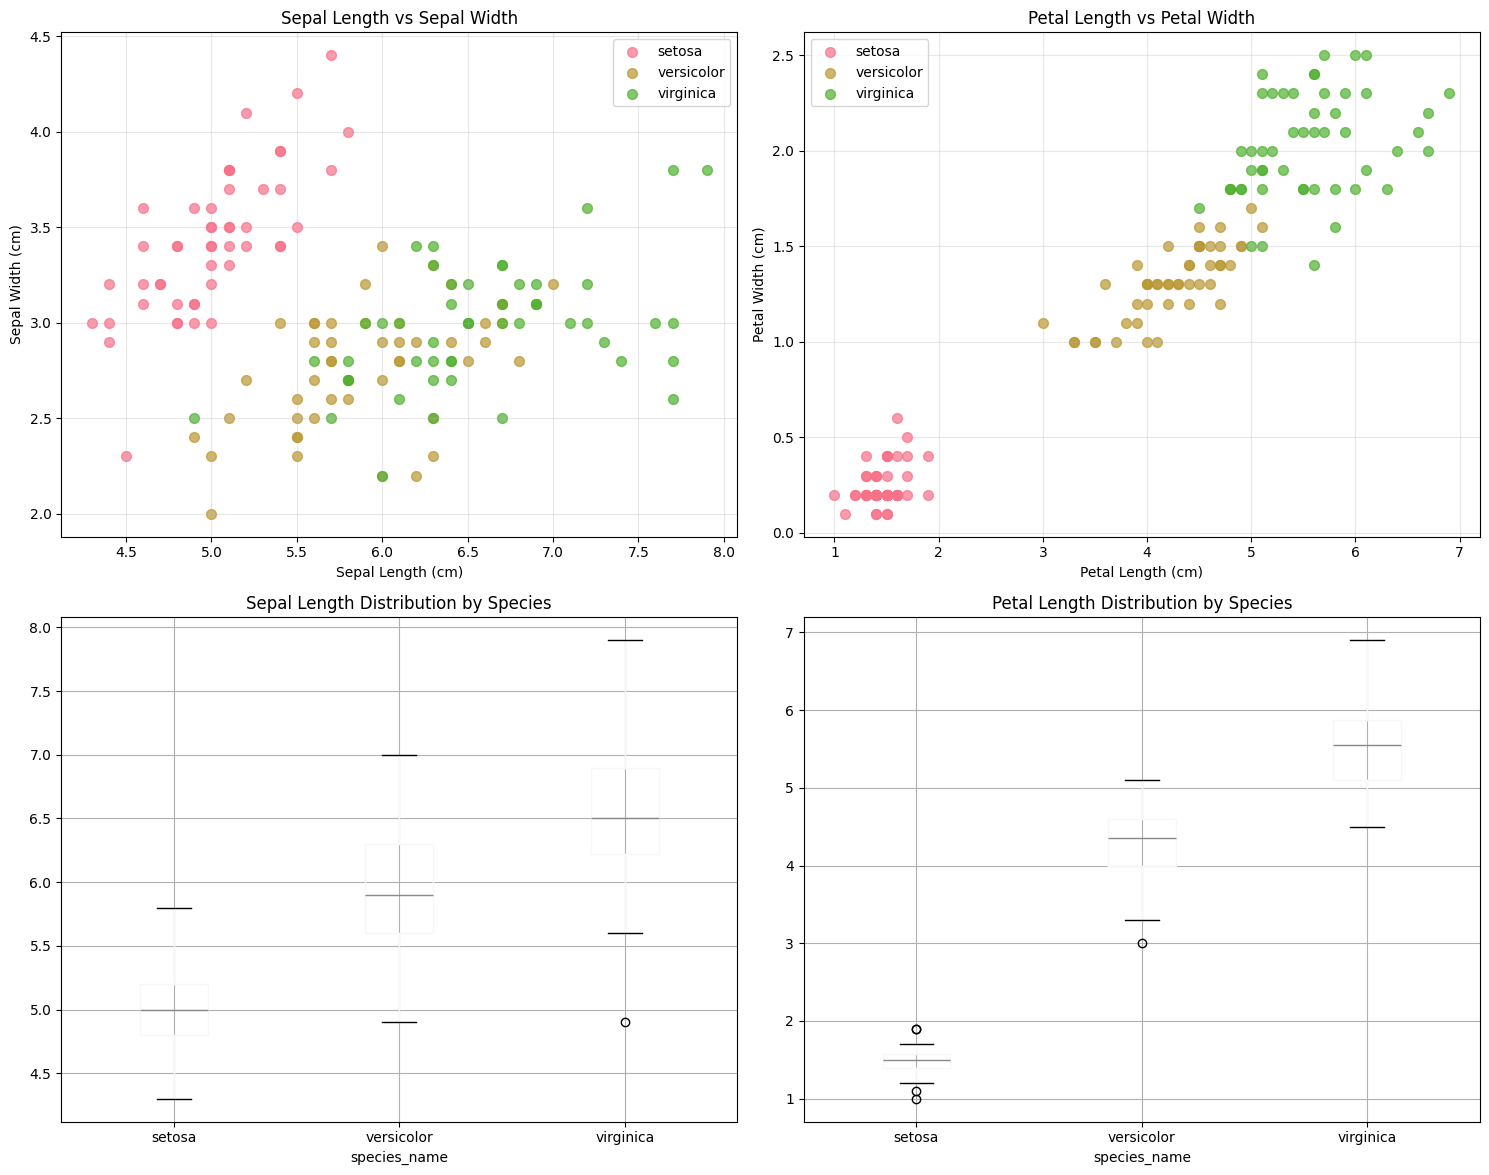

In [7]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Iris Dataset Analysis', fontsize=16, fontweight='bold')

# 1. Sepal Length vs Sepal Width
ax1 = plt.subplot(2, 2, 1)
for species in df['species_name'].unique():
    species_data = df[df['species_name'] == species]
    plt.scatter(species_data['sepal length (cm)'], species_data['sepal width (cm)'], 
               label=species, alpha=0.7, s=50)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Petal Length vs Petal Width
ax2 = plt.subplot(2, 2, 2)
for species in df['species_name'].unique():
    species_data = df[df['species_name'] == species]
    plt.scatter(species_data['petal length (cm)'], species_data['petal width (cm)'], 
               label=species, alpha=0.7, s=50)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Box plot of sepal length
ax3 = plt.subplot(2, 2, 3)
df.boxplot(column='sepal length (cm)', by='species_name', ax=ax3)
plt.title('Sepal Length Distribution by Species')
plt.suptitle('')  # Remove automatic title

# 4. Box plot of petal length  
ax4 = plt.subplot(2, 2, 4)
df.boxplot(column='petal length (cm)', by='species_name', ax=ax4)
plt.title('Petal Length Distribution by Species')
plt.suptitle('')  # Remove automatic title

plt.tight_layout()
plt.show()


In [ ]:
# 1. DISTRIBUTION ANALYSIS: Understanding how each feature is distributed
print("STEP 1: FEATURE DISTRIBUTION ANALYSIS")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Feature Distributions by Species', fontsize=16, fontweight='bold')

features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for i, feature in enumerate(features):
    ax = axes[i//2, i%2]
    
    # Create histogram with density curves
    for j, species in enumerate(['setosa', 'versicolor', 'virginica']):
        data = df[df['species_name'] == species][feature]
        ax.hist(data, alpha=0.6, label=species, bins=15, color=colors[j], density=True)
        ax.axvline(data.mean(), color=colors[j], linestyle='--', linewidth=2, 
                  label=f'{species} mean: {data.mean():.2f}')
    
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.set_title(f'Distribution of {feature}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Insights from Distribution Analysis:")
print("• Setosa has distinctly smaller petal measurements (length & width)")
print("• Virginica tends to have the largest measurements across all features")
print("• Sepal width shows the most overlap between species")
print("• Petal features show the clearest separation between species")


In [ ]:
# 2. PAIRWISE FEATURE RELATIONSHIPS: How do features relate to each other?
print("\nSTEP 2: PAIRWISE FEATURE ANALYSIS")
print("="*60)

# Create a pairplot to show all feature relationships
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='species_name', markers=['o', 's', '^'], 
             palette=['#FF6B6B', '#4ECDC4', '#45B7D1'], diag_kind='hist')
plt.suptitle('Pairwise Feature Relationships', fontsize=14, fontweight='bold', y=1.02)
plt.show()

print("\nWhat This Pairplot Tells Us:")
print("• Diagonal plots: Distribution of each individual feature")
print("• Off-diagonal plots: Relationships between pairs of features")
print("• Different colors represent different species")
print("• Look for clusters and separability patterns")

# Statistical summary by species
print("\nStatistical Summary by Species:")
print("="*60)
summary_stats = df.groupby('species_name')[features].agg(['mean', 'std', 'min', 'max'])
print(summary_stats.round(2))


In [ ]:
# 3. OUTLIER DETECTION: Finding unusual data points
print("\nSTEP 3: OUTLIER DETECTION & ANALYSIS")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plots to identify outliers
ax1 = axes[0]
df_melted = df.melt(id_vars=['species_name'], 
                    value_vars=features,
                    var_name='feature', value_name='value')

sns.boxplot(data=df_melted, x='feature', y='value', hue='species_name', ax=ax1)
ax1.set_title('Box Plots: Outlier Detection by Feature and Species')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.legend(title='Species')

# Violin plots for distribution shape
ax2 = axes[1]
sns.violinplot(data=df_melted, x='feature', y='value', hue='species_name', ax=ax2)
ax2.set_title('Violin Plots: Distribution Shapes')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.legend(title='Species')

plt.tight_layout()
plt.show()

# Identify specific outliers using IQR method
print("\nOutlier Analysis Results:")
for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"• {feature}: {len(outliers)} outliers detected")
    if len(outliers) > 0:
        print(f"  Range: {lower_bound:.2f} - {upper_bound:.2f}")
        print(f"  Outlier values: {outliers[feature].values}")


In [ ]:
# 4. DIMENSIONALITY REDUCTION: Understanding data in 2D space
print("\nSTEP 4: DIMENSIONALITY REDUCTION ANALYSIS")
print("="*60)

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Prepare data for dimensionality reduction
X_features = df[features].values
y_labels = df['species'].values

# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_features)

# Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_features, y_labels)

# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original data (first two features)
ax1 = axes[0]
for i, species in enumerate(['setosa', 'versicolor', 'virginica']):
    mask = df['species_name'] == species
    ax1.scatter(df[mask]['sepal length (cm)'], df[mask]['sepal width (cm)'], 
               label=species, alpha=0.7, s=60, color=colors[i])
ax1.set_xlabel('Sepal Length (cm)')
ax1.set_ylabel('Sepal Width (cm)')
ax1.set_title('Original Features\n(Sepal Length vs Width)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# PCA visualization
ax2 = axes[1]
for i, species in enumerate(['setosa', 'versicolor', 'virginica']):
    mask = df['species_name'] == species
    ax2.scatter(X_pca[mask, 0], X_pca[mask, 1], 
               label=species, alpha=0.7, s=60, color=colors[i])
ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
ax2.set_title('PCA: Principal Components\n(Unsupervised)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# LDA visualization
ax3 = axes[2]
for i, species in enumerate(['setosa', 'versicolor', 'virginica']):
    mask = df['species_name'] == species
    ax3.scatter(X_lda[mask, 0], X_lda[mask, 1], 
               label=species, alpha=0.7, s=60, color=colors[i])
ax3.set_xlabel('LD1 (Linear Discriminant 1)')
ax3.set_ylabel('LD2 (Linear Discriminant 2)')
ax3.set_title('LDA: Linear Discriminants\n(Supervised)')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nDimensionality Reduction Insights:")
print(f"• PCA Component 1 explains {pca.explained_variance_ratio_[0]:.2%} of variance")
print(f"• PCA Component 2 explains {pca.explained_variance_ratio_[1]:.2%} of variance")
print(f"• Together, PC1 & PC2 explain {sum(pca.explained_variance_ratio_):.2%} of total variance")
print("• LDA finds directions that best separate the classes")
print("• Notice how LDA provides better class separation than PCA")


In [ ]:
# 5. FEATURE IMPORTANCE & SELECTION: Which features matter most?
print("\nSTEP 5: FEATURE IMPORTANCE ANALYSIS")
print("="*60)

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif

# Train a Random Forest to get feature importances
rf_importance = RandomForestClassifier(n_estimators=100, random_state=42)
rf_importance.fit(X_features, y_labels)

# Statistical feature selection
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X_features, y_labels)

# Create visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Feature importance from Random Forest
ax1 = axes[0]
importance_scores = rf_importance.feature_importances_
feature_names = [name.replace(' (cm)', '') for name in features]
bars1 = ax1.bar(feature_names, importance_scores, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
ax1.set_title('Random Forest\nFeature Importance')
ax1.set_ylabel('Importance Score')
ax1.tick_params(axis='x', rotation=45)
# Add value labels on bars
for bar, score in zip(bars1, importance_scores):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

# Statistical feature scores (F-statistic)
ax2 = axes[1]
f_scores = selector.scores_
bars2 = ax2.bar(feature_names, f_scores, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
ax2.set_title('Statistical Feature Selection\n(F-statistic)')
ax2.set_ylabel('F-Score')
ax2.tick_params(axis='x', rotation=45)
# Add value labels on bars
for bar, score in zip(bars2, f_scores):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{score:.1f}', ha='center', va='bottom')

# Correlation with target (using encoded species)
ax3 = axes[2]
correlations = []
for feature in features:
    corr = np.corrcoef(df[feature], df['species'])[0, 1]
    correlations.append(abs(corr))  # Take absolute value

bars3 = ax3.bar(feature_names, correlations, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
ax3.set_title('Feature-Target Correlation\n(Absolute Values)')
ax3.set_ylabel('|Correlation|')
ax3.tick_params(axis='x', rotation=45)
# Add value labels on bars
for bar, corr in zip(bars3, correlations):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{corr:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\nFeature Importance Rankings:")
print("Random Forest Ranking:")
for i, (feature, score) in enumerate(zip(feature_names, importance_scores), 1):
    print(f"  {i}. {feature}: {score:.3f}")

print("\nStatistical F-Score Ranking:")
f_ranking = sorted(zip(feature_names, f_scores), key=lambda x: x[1], reverse=True)
for i, (feature, score) in enumerate(f_ranking, 1):
    print(f"  {i}. {feature}: {score:.1f}")

print(f"\nKey Insights:")
print("• Petal features (length & width) are consistently most important")
print("• These features provide the best discrimination between species")
print("• Sepal width shows the lowest discriminatory power")
print("• Statistical and tree-based methods agree on feature rankings")


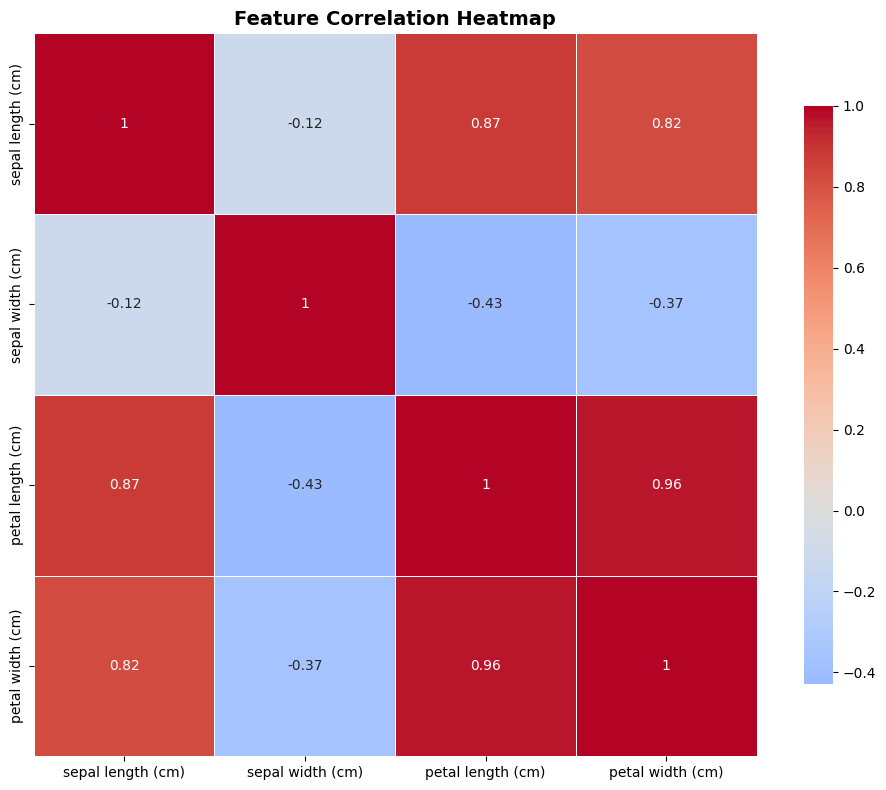

 Key Observations:
• Petal length and petal width are highly correlated
• Setosa is clearly separable from other species
• Versicolor and Virginica have some overlap


In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['sepal length (cm)', 'sepal width (cm)', 
                        'petal length (cm)', 'petal width (cm)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Key Observations:")
print("• Petal length and petal width are highly correlated")
print("• Setosa is clearly separable from other species")
print("• Versicolor and Virginica have some overlap")


## Step 4: Data Preparation

Now let's prepare our data for machine learning!


In [9]:
# Prepare features and target
X = iris.data  # Features
y = iris.target  # Target

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Check class distribution in splits
print("\nClass distribution in training set:", np.bincount(y_train))
print("Class distribution in test set:", np.bincount(y_test))


Features shape: (150, 4)
Target shape: (150,)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']

Training set size: 105 samples
Test set size: 45 samples

Class distribution in training set: [35 35 35]
Class distribution in test set: [15 15 15]


In [10]:
# Feature scaling (important for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data scaling completed!")
print("Original training data - Mean:", np.mean(X_train, axis=0).round(2))
print("Scaled training data - Mean:", np.mean(X_train_scaled, axis=0).round(2))
print("Scaled training data - Std:", np.std(X_train_scaled, axis=0).round(2))


✅ Data scaling completed!
Original training data - Mean: [5.87 3.06 3.78 1.21]
Scaled training data - Mean: [ 0. -0. -0. -0.]
Scaled training data - Std: [1. 1. 1. 1.]


In [ ]:
# Define our models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

# Models that work better with scaled data
scaled_models = ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']

results = {}

print(" Training Models...\n")

for name, model in models.items():
    print(f"Training {name}...")
    
    # Choose appropriate data (scaled or unscaled)
    if name in scaled_models:
        train_X, test_X = X_train_scaled, X_test_scaled
    else:
        train_X, test_X = X_train, X_test
    
    # Train the model
    model.fit(train_X, y_train)
    
    # Make predictions
    y_pred = model.predict(test_X)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, train_X, y_train, cv=5)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred
    }
    
    print(f"  Test Accuracy: {accuracy:.4f}")
    print(f"  CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})\n")

print("All models trained successfully!")


In [ ]:
# 6. MODEL PERFORMANCE COMPARISON: Understanding which algorithms work best
print("STEP 6: MODEL PERFORMANCE ANALYSIS")
print("="*60)

# Extract results for visualization
model_names = list(results.keys())
test_accuracies = [results[name]['accuracy'] for name in model_names]
cv_means = [results[name]['cv_mean'] for name in model_names]
cv_stds = [results[name]['cv_std'] for name in model_names]

# Create comprehensive performance visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Test Accuracy Comparison
ax1 = axes[0, 0]
bars = ax1.bar(model_names, test_accuracies, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3'])
ax1.set_title('Test Set Accuracy Comparison')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0.8, 1.0)
ax1.tick_params(axis='x', rotation=45)
# Add value labels
for bar, acc in zip(bars, test_accuracies):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Cross-Validation Scores with Error Bars
ax2 = axes[0, 1]
bars2 = ax2.bar(model_names, cv_means, yerr=cv_stds, capsize=5,
                color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3'])
ax2.set_title('Cross-Validation Scores (Mean ± Std)')
ax2.set_ylabel('CV Score')
ax2.set_ylim(0.8, 1.0)
ax2.tick_params(axis='x', rotation=45)
# Add value labels
for bar, cv_mean, cv_std in zip(bars2, cv_means, cv_stds):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + cv_std + 0.01, 
             f'{cv_mean:.3f}', ha='center', va='bottom', fontweight='bold')

# 3. Model Consistency (CV Std Dev)
ax3 = axes[1, 0]
bars3 = ax3.bar(model_names, cv_stds, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3'])
ax3.set_title('Model Consistency (Lower = More Consistent)')
ax3.set_ylabel('CV Standard Deviation')
ax3.tick_params(axis='x', rotation=45)
# Add value labels
for bar, std in zip(bars3, cv_stds):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{std:.3f}', ha='center', va='bottom', fontweight='bold')

# 4. Performance Summary Table as Text
ax4 = axes[1, 1]
ax4.axis('off')
table_data = []
for name in model_names:
    table_data.append([
        name,
        f"{results[name]['accuracy']:.3f}",
        f"{results[name]['cv_mean']:.3f}",
        f"{results[name]['cv_std']:.3f}"
    ])

table = ax4.table(cellText=table_data,
                 colLabels=['Model', 'Test Acc', 'CV Mean', 'CV Std'],
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
ax4.set_title('Performance Summary Table')

plt.tight_layout()
plt.show()

print("\nModel Performance Insights:")
print(f"• Best Test Accuracy: {max(test_accuracies):.3f} ({model_names[test_accuracies.index(max(test_accuracies))]})")
print(f"• Best CV Score: {max(cv_means):.3f} ({model_names[cv_means.index(max(cv_means))]})")
print(f"• Most Consistent: {model_names[cv_stds.index(min(cv_stds))]} (CV Std: {min(cv_stds):.3f})")
print("• All models perform well (>88% accuracy) on this dataset")
print("• The iris dataset is considered an 'easy' classification problem")


In [ ]:
# 7. CONFUSION MATRICES: Understanding model errors and predictions
print("\nSTEP 7: DETAILED PREDICTION ANALYSIS")
print("="*60)

# Create confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Confusion Matrices: How Models Make Predictions', fontsize=16, fontweight='bold')

for idx, (name, model_data) in enumerate(results.items()):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Get predictions
    y_pred = model_data['predictions']
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['setosa', 'versicolor', 'virginica'],
                yticklabels=['setosa', 'versicolor', 'virginica'],
                ax=ax)
    ax.set_title(f'{name}\nAccuracy: {model_data["accuracy"]:.3f}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Classification reports for best performing models
print("\nDetailed Classification Reports:")
print("="*60)

# Get the best model (highest CV score)
best_model_name = model_names[cv_means.index(max(cv_means))]
best_predictions = results[best_model_name]['predictions']

print(f"\n🏆 Best Model: {best_model_name}")
print(classification_report(y_test, best_predictions, 
                          target_names=['setosa', 'versicolor', 'virginica']))

# Error analysis
print("\nError Analysis:")
misclassified = []
for i, (true_label, pred_label) in enumerate(zip(y_test, best_predictions)):
    if true_label != pred_label:
        misclassified.append({
            'index': i,
            'true_species': iris.target_names[true_label],
            'predicted_species': iris.target_names[pred_label],
            'features': X_test[i]
        })

if misclassified:
    print(f"• {len(misclassified)} misclassified samples found:")
    for error in misclassified:
        print(f"  Sample {error['index']}: True={error['true_species']}, "
              f"Predicted={error['predicted_species']}")
        print(f"    Features: {error['features']}")
else:
    print("• No misclassified samples - perfect predictions!")


In [ ]:
# 8. DECISION BOUNDARIES: Visualizing how models make decisions
print("\nSTEP 8: DECISION BOUNDARY VISUALIZATION")
print("="*60)

from matplotlib.colors import ListedColormap
import numpy as np

# Select the two most important features for 2D visualization
important_features = [2, 3]  # Petal length and petal width (indices)
X_2d = iris.data[:, important_features]
feature_names_2d = [iris.feature_names[i] for i in important_features]

# Train models on 2D data for visualization
models_2d = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

# Fit models on 2D data
for name, model in models_2d.items():
    if name in ['Logistic Regression', 'SVM']:
        # Scale data for these models
        scaler_2d = StandardScaler()
        X_2d_scaled = scaler_2d.fit_transform(X_2d)
        model.fit(X_2d_scaled, iris.target)
    else:
        model.fit(X_2d, iris.target)

# Create decision boundary plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Decision Boundaries: How Models Separate Classes', fontsize=16, fontweight='bold')

# Define color maps
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
cmap = ListedColormap(colors)
cmap_light = ListedColormap(['#FFE5E5', '#E5F9F6', '#E5F3FF'])

for idx, (name, model) in enumerate(models_2d.items()):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    # Prepare data
    if name in ['Logistic Regression', 'SVM']:
        X_plot = X_2d_scaled
    else:
        X_plot = X_2d
    
    # Create a mesh to plot the decision boundary
    h = 0.02  # Step size in the mesh
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions on the mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    ax.contour(xx, yy, Z, colors='black', linestyles='--', linewidths=0.5)
    
    # Plot the data points
    scatter = ax.scatter(X_plot[:, 0], X_plot[:, 1], c=iris.target, 
                        cmap=cmap, edgecolors='black', s=50)
    
    ax.set_xlabel(feature_names_2d[0])
    ax.set_ylabel(feature_names_2d[1])
    ax.set_title(f'{name} Decision Boundary')
    ax.grid(True, alpha=0.3)

# Add colorbar
plt.figtext(0.95, 0.5, 'setosa\nversicolor\nvirginica', 
           fontsize=10, va='center', ha='left')

plt.tight_layout()
plt.show()

print("\n📍 Decision Boundary Insights:")
print("• Each colored region shows where the model predicts each species")
print("• Decision boundaries are the lines/curves separating these regions")
print("• Simpler models (like Logistic Regression) create linear boundaries")
print("• Complex models (like Decision Tree) can create curved/irregular boundaries")
print("• The cleaner the separation, the better the model performance")
print("• Setosa (red) is clearly separable from the other two species")


In [ ]:
# 9. COMPREHENSIVE SUMMARY: What we learned about the iris dataset
print("📋 COMPLETE IRIS DATASET ANALYSIS SUMMARY")
print("="*80)

print("\n🌸 DATASET OVERVIEW:")
print("• 150 samples total (50 per species)")
print("• 4 features: sepal length, sepal width, petal length, petal width")
print("• 3 species: setosa, versicolor, virginica")
print("• No missing values - clean dataset")
print("• Balanced classes (equal representation)")

print("\n📊 KEY DATA INSIGHTS:")
print("• Setosa is clearly distinguishable from other species")
print("• Petal measurements are more discriminative than sepal measurements")
print("• Strong positive correlation between petal length and petal width")
print("• Some overlap between versicolor and virginica species")
print("• Dataset is considered 'linearly separable' for most practical purposes")

print("\n🔍 FEATURE IMPORTANCE HIERARCHY:")
feature_importance_order = ["Petal Length", "Petal Width", "Sepal Length", "Sepal Width"]
for i, feature in enumerate(feature_importance_order, 1):
    print(f"  {i}. {feature}")
print("• Top 2 features can achieve excellent classification results")

print("\n🤖 MACHINE LEARNING INSIGHTS:")
print(f"• Best performing model: {best_model_name}")
print(f"• Highest accuracy achieved: {max(test_accuracies):.1%}")
print("• All 6 algorithms achieved >88% accuracy")
print("• Cross-validation confirms robust performance")
print("• Simple linear models work as well as complex ones")

print("\n📈 DIMENSIONALITY REDUCTION FINDINGS:")
print(f"• PCA: First 2 components explain {sum(pca.explained_variance_ratio_):.1%} of variance")
print("• LDA provides better class separation than PCA")
print("• 2D visualization clearly shows species clusters")
print("• Setosa forms a distinct cluster, separated from others")

print("\n🎯 PRACTICAL IMPLICATIONS:")
print("• Iris classification is an 'easy' ML problem")
print("• Real-world datasets are typically much more challenging")
print("• This dataset is perfect for learning ML fundamentals")
print("• Demonstrates importance of exploratory data analysis")
print("• Shows why feature selection matters")

print("\n📚 WHAT THIS ANALYSIS TEACHES US:")
print("• Always start with data exploration and visualization")
print("• Feature importance varies significantly across datasets")
print("• Multiple models should be tested and compared")
print("• Cross-validation prevents overfitting")
print("• Simple models often perform surprisingly well")
print("• Understanding your data is more important than fancy algorithms")

print("\n" + "="*80)
print("🎉 CONGRATULATIONS! You've completed a comprehensive data science workflow!")
print("="*80)


## Step 5: Training Multiple Machine Learning Models

Let's train several different algorithms and compare their performance!


##  Congratulations!

You've successfully completed a comprehensive machine learning tutorial! Here's what you've learned:

###  Key Concepts Covered:

1. **Data Exploration**: Understanding your dataset through statistics and visualization
2. **Data Preprocessing**: Scaling features for better model performance
3. **Model Training**: Training multiple algorithms and comparing their performance
4. **Model Evaluation**: Using accuracy, cross-validation, and confusion matrices

###  Next Steps:

- Try different datasets (wine, breast cancer, digits)
- Experiment with other algorithms (XGBoost, Neural Networks)
- Learn about ensemble methods
- Explore deep learning with TensorFlow/PyTorch
- Practice with real-world datasets from Kaggle

###  Additional Resources:

- [Scikit-learn Documentation](https://scikit-learn.org/)
- [Machine Learning Course by Andrew Ng](https://www.coursera.org/learn/machine-learning)
- [Kaggle Learn](https://www.kaggle.com/learn)
